In [79]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn import metrics
from sklearn.metrics import confusion_matrix
from sklearn.metrics import classification_report
from sklearn.metrics import accuracy_score, confusion_matrix, f1_score, precision_score, recall_score, plot_roc_curve

In [80]:
f = pd.read_excel("train.xlsx")
t = pd.read_excel("test.xlsx")
df  = pd.DataFrame(f)
df2 = pd.DataFrame(t)
df
df2

,PassengerId,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,892,3,"Kelly, Mr. James",male,34.5,0,0,330911,7.8292,NaN,Q
1,893,3,"Wilkes, Mrs. James (Ellen Needs)",female,47.0,1,0,363272,7.0000,NaN,S
2,894,2,"Myles, Mr. Thomas Francis",male,62.0,0,0,240276,9.6875,NaN,Q
3,895,3,"Wirz, Mr. Albert",male,27.0,0,0,315154,8.6625,NaN,S
4,896,3,"Hirvonen, Mrs. Alexander (Helga E Lindqvist)",female,22.0,1,1,3101298,12.2875,NaN,S
...,...,...,...,...,...,...,...,...,...,...,...
413,1305,3,"Spector, Mr. Woolf",male,NaN,0,0,A.5. 3236,8.0500,NaN,S
414,1306,1,"Oliva y Ocana, Dona. Fermina",female,39.0,0,0,PC 17758,108.9000,C105,C
415,1307,3,"Saether, Mr. Simon Sivertsen",male,38.5,0,0,SOTON/O.Q. 3101262,7.2500,NaN,S
416,1308,3,"Ware, Mr. Frederick",male,NaN,0,0,359309,8.0500,NaN,S


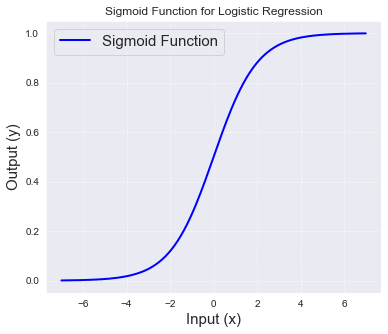

In [81]:



def sigmoid(x):
    return 1 / (1 + np.exp(-x))

x = np.linspace(-7, 7, 200)

y = sigmoid(x)


plt.figure(figsize=(6, 5))
plt.plot(x, y, label='Sigmoid Function', color='blue', linewidth=2)


plt.xlabel('Input (x)',fontsize = 15 )
plt.ylabel('Output (y)',fontsize = 15)
plt.title('Sigmoid Function for Logistic Regression')

plt.grid(True, linestyle='--', alpha=0.6)

plt.legend(loc='upper left',fontsize = 15)

plt.show()


In [82]:
df.info()
df2.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 418 entries, 0 to 417
Data columns (total 11 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  418 non-null    int64  
 1   Pclass  

In [83]:
df.isnull().sum()


PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age            177
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
dtype: int64

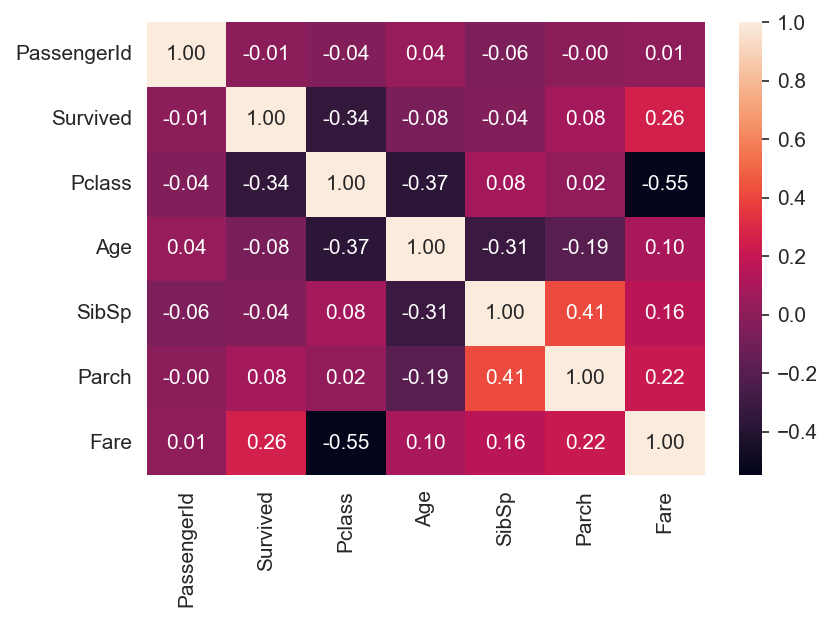

In [84]:
corr = df.corr()
plt.figure(dpi=150)
sns.heatmap(df.corr(), annot=True, fmt= '.2f')
plt.show()

<AxesSubplot:>

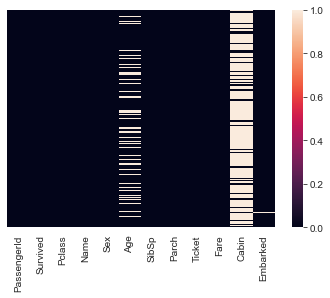

In [85]:
sns.heatmap(df.isnull(),yticklabels=False)

<AxesSubplot:xlabel='Survived', ylabel='count'>

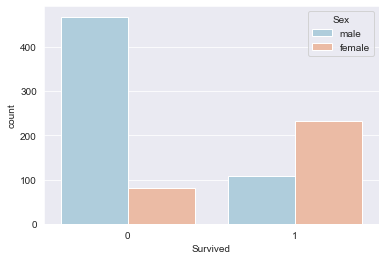

In [86]:
sns.countplot(x=df['Survived'],hue=df['Sex'],palette='RdBu_r')

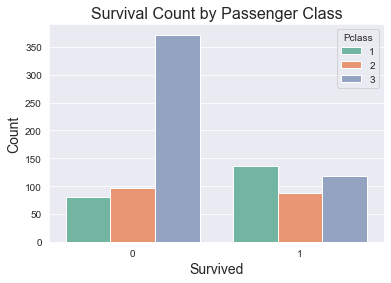

In [87]:
import seaborn as sns
import matplotlib.pyplot as plt


import seaborn as sns
import matplotlib.pyplot as plt

# Define a different color palette
custom_palette = sns.color_palette("Set2")  # You can replace "Set2" with other palette names


sns.countplot(x=df['Survived'], hue=df['Pclass'], palette=custom_palette)

plt.xlabel('Survived', fontsize=14)
plt.ylabel('Count', fontsize=14)
plt.title('Survival Count by Passenger Class', fontsize=16)
plt.legend(title='Pclass')

plt.show()


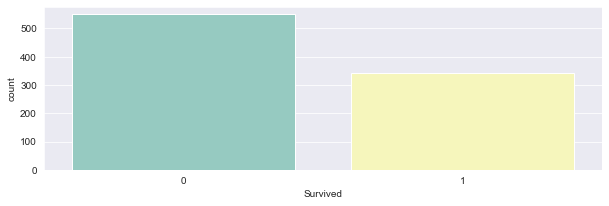

In [88]:
sns.set_style("darkgrid")
plt.figure(figsize=(10, 3))
sns.countplot(x = "Survived",data=df, palette="Set3")
plt.show()

<Figure size 720x216 with 0 Axes>

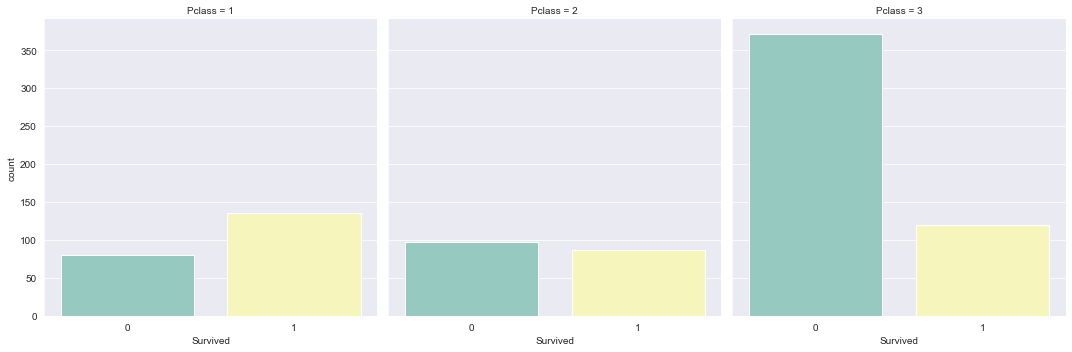

In [89]:
plt.figure(figsize=(10, 3))
sns.catplot(x='Survived', col='Pclass', kind='count', data=df,palette="Set3");
plt.show()

<Figure size 720x216 with 0 Axes>

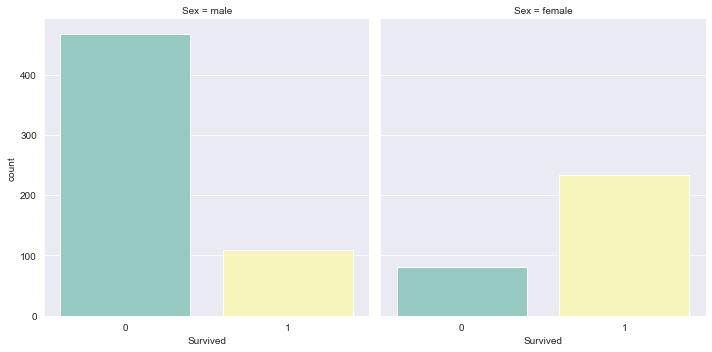

In [90]:
plt.figure(figsize=(10, 3))
sns.catplot(x='Survived', col='Sex', kind='count', data=df,palette="Set3");
plt.show()

Text(0.5, 1.0, 'Age over Pclass')

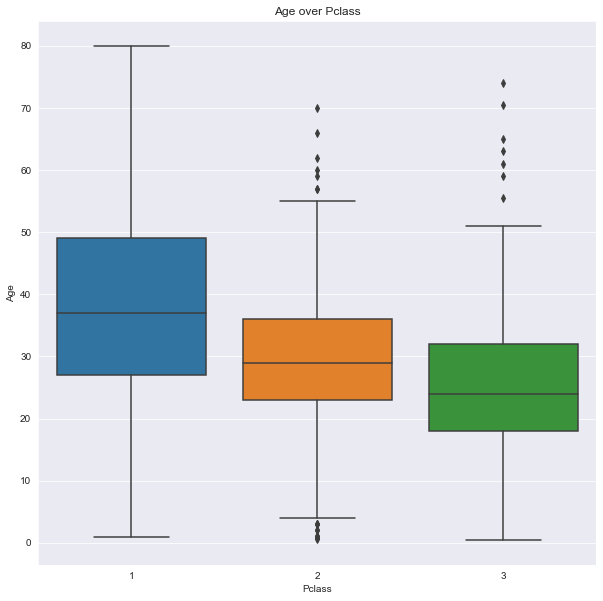

In [91]:
plt.figure(figsize=(10, 10))
sns.boxplot(x='Pclass',y='Age',data=df)
plt.title('Age over Pclass')

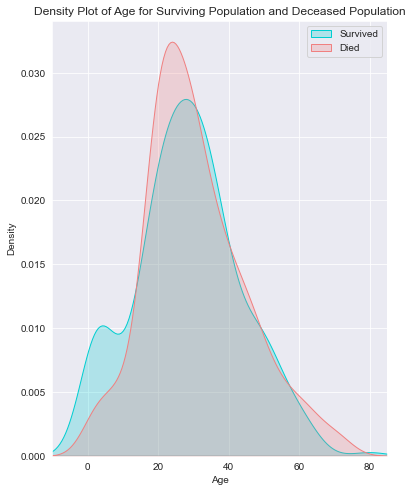

In [92]:


plt.figure(figsize=(6,8))
ax = sns.kdeplot(df["Age"][df.Survived == 1], color="darkturquoise", shade=True)
sns.kdeplot(df["Age"][df.Survived == 0], color="lightcoral", shade=True)
plt.legend(['Survived', 'Died'])
plt.title('Density Plot of Age for Surviving Population and Deceased Population')
ax.set(xlabel='Age')
plt.xlim(-10,85)
plt.show()



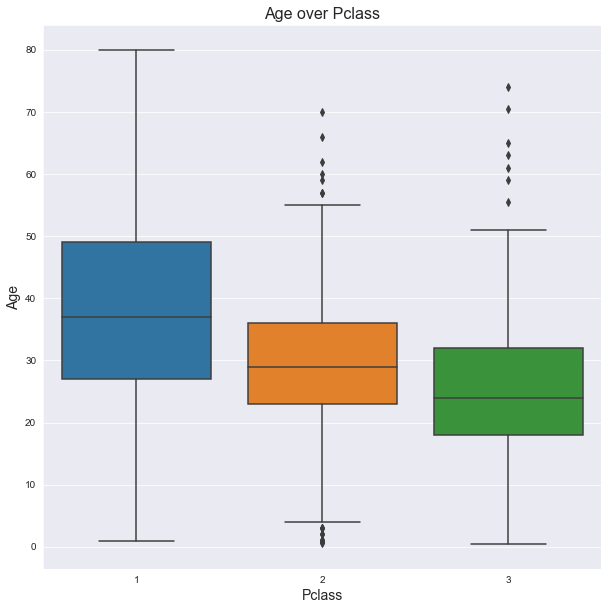

In [93]:
import seaborn as sns
import matplotlib.pyplot as plt



plt.figure(figsize=(10, 10))
sns.boxplot(x='Pclass', y='Age', data=df)


plt.title('Age over Pclass', fontsize=16)


plt.xlabel('Pclass', fontsize=14)


plt.ylabel('Age', fontsize=14)

plt.show()


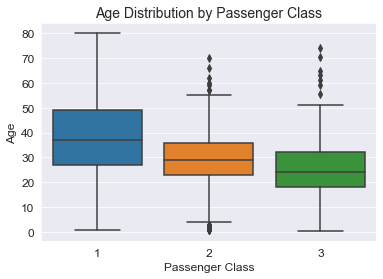

In [94]:
import seaborn as sns
import matplotlib.pyplot as plt


import seaborn as sns
import matplotlib.pyplot as plt

sns.boxplot(x='Pclass', y='Age', data=df)


plt.title('Age Distribution by Passenger Class', fontsize=14)  


plt.xticks(fontsize=12)  
plt.yticks(fontsize=12)  

plt.xlabel('Passenger Class', fontsize=12) 
plt.ylabel('Age', fontsize=12)  

plt.show()



In [95]:
df1 = df.drop(['PassengerId','Ticket','Name','Cabin','Parch'],axis =1)
df1

,Survived,Pclass,Sex,Age,SibSp,Fare,Embarked
0,0,3,male,22.0,1,7.2500,S
1,1,1,female,38.0,1,71.2833,C
2,1,3,female,26.0,0,7.9250,S
3,1,1,female,35.0,1,53.1000,S
4,0,3,male,35.0,0,8.0500,S
...,...,...,...,...,...,...,...
886,0,2,male,27.0,0,13.0000,S
887,1,1,female,19.0,0,30.0000,S
888,0,3,female,NaN,1,23.4500,S
889,1,1,male,26.0,0,30.0000,C


In [96]:
df1.Sex[df1.Sex == 'male'] = 1
df1.Sex[df1.Sex == 'female'] = 0
# sex = pd.get_dummies(df1["Sex"])
# embarked = pd.get_dummies(df1["Embarked"])
df1

C:\Users\Pankaj\AppData\Local\Temp\ipykernel_25204\3446522507.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df1.Sex[df1.Sex == 'male'] = 1
C:\Users\Pankaj\AppData\Local\Temp\ipykernel_25204\3446522507.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df1.Sex[df1.Sex == 'female'] = 0


,Survived,Pclass,Sex,Age,SibSp,Fare,Embarked
0,0,3,1,22.0,1,7.2500,S
1,1,1,0,38.0,1,71.2833,C
2,1,3,0,26.0,0,7.9250,S
3,1,1,0,35.0,1,53.1000,S
4,0,3,1,35.0,0,8.0500,S
...,...,...,...,...,...,...,...
886,0,2,1,27.0,0,13.0000,S
887,1,1,0,19.0,0,30.0000,S
888,0,3,0,NaN,1,23.4500,S
889,1,1,1,26.0,0,30.0000,C


In [97]:
df1.isnull().sum()

Survived      0
Pclass        0
Sex           0
Age         177
SibSp         0
Fare          0
Embarked      2
dtype: int64

In [98]:
df1.describe()


,Survived,Pclass,Age,SibSp,Fare
count,891.000000,891.000000,714.000000,891.000000,891.000000
mean,0.383838,2.308642,29.699118,0.523008,32.204208
std,0.486592,0.836071,14.526497,1.102743,49.693429
min,0.000000,1.000000,0.420000,0.000000,0.000000
25%,0.000000,2.000000,20.125000,0.000000,7.910400
50%,0.000000,3.000000,28.000000,0.000000,14.454200
75%,1.000000,3.000000,38.000000,1.000000,31.000000
max,1.000000,3.000000,80.000000,8.000000,512.329200


In [99]:
df1.isnull().sum()

Survived      0
Pclass        0
Sex           0
Age         177
SibSp         0
Fare          0
Embarked      2
dtype: int64

In [100]:
def impute_train_age(cols):
    Age = cols[0]
    Pclass = cols[1]
    
    if pd.isnull(Age):

        if Pclass == 1:
            return 37

        elif Pclass == 2:
            return 29

        else:
            return 24

    else:
        return Age


   

# df1.Age = df1.Age.fillna(24)
# df1

In [101]:
df1['Age'] = df1[['Age','Pclass']].apply(impute_train_age,axis=1) 

In [102]:
df1.Embarked[df1.Embarked == 'C'] = 1
df1.Embarked[df1.Embarked == 'Q'] = 3
df1.Embarked[df1.Embarked == 'S'] = 2
df1

C:\Users\Pankaj\AppData\Local\Temp\ipykernel_25204\1551103135.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df1.Embarked[df1.Embarked == 'C'] = 1
C:\Users\Pankaj\AppData\Local\Temp\ipykernel_25204\1551103135.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df1.Embarked[df1.Embarked == 'Q'] = 3
C:\Users\Pankaj\AppData\Local\Temp\ipykernel_25204\1551103135.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df1.Embarked[df1.Emba

,Survived,Pclass,Sex,Age,SibSp,Fare,Embarked
0,0,3,1,22.0,1,7.2500,2
1,1,1,0,38.0,1,71.2833,1
2,1,3,0,26.0,0,7.9250,2
3,1,1,0,35.0,1,53.1000,2
4,0,3,1,35.0,0,8.0500,2
...,...,...,...,...,...,...,...
886,0,2,1,27.0,0,13.0000,2
887,1,1,0,19.0,0,30.0000,2
888,0,3,0,24.0,1,23.4500,2
889,1,1,1,26.0,0,30.0000,1


In [103]:
df1.isnull().sum()

Survived    0
Pclass      0
Sex         0
Age         0
SibSp       0
Fare        0
Embarked    2
dtype: int64

In [104]:
df1 = df1.dropna()

In [105]:
df1

,Survived,Pclass,Sex,Age,SibSp,Fare,Embarked
0,0,3,1,22.0,1,7.2500,2
1,1,1,0,38.0,1,71.2833,1
2,1,3,0,26.0,0,7.9250,2
3,1,1,0,35.0,1,53.1000,2
4,0,3,1,35.0,0,8.0500,2
...,...,...,...,...,...,...,...
886,0,2,1,27.0,0,13.0000,2
887,1,1,0,19.0,0,30.0000,2
888,0,3,0,24.0,1,23.4500,2
889,1,1,1,26.0,0,30.0000,1


In [106]:
X= df1.drop(['Survived','Embarked'],axis =1)
Y = df1['Survived']

In [107]:
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score
X_train, X_test,\
Y_train, Y_test = train_test_split(X, Y,
test_size=0.30,
random_state=0)
# LogisticRegression
clf = LogisticRegression(random_state=0)
clf.fit(X_train, Y_train)
# Prediction
y_pred = clf.predict(X_test)

acc = accuracy_score(Y_test, y_pred)
print("Logistic Regression model accuracy (in %):", acc*100)



Logistic Regression model accuracy (in %): 79.02621722846442


In [108]:
confusion_matrix = confusion_matrix(Y_test,y_pred)
confusion_matrix

array([[134,  23],
       [ 33,  77]], dtype=int64)

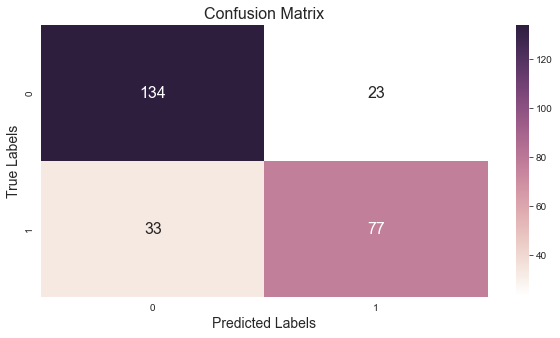

In [109]:

cmap = sns.cubehelix_palette(light=1, as_cmap=True)

plt.figure(figsize=(10, 5))


sns.heatmap(confusion_matrix, annot=True, fmt='d', cmap=cmap, annot_kws={"size": 16})


plt.xlabel('Predicted Labels', fontsize=14)
plt.ylabel('True Labels', fontsize=14)
plt.title('Confusion Matrix', fontsize=16)


plt.show()


In [110]:
TP=77
TN=134
FN=33
FP=23

Accuracy = (TP+TN)/(TP+FP+FN+TN)
Precision = TP/(TP+FP)
Recall = TP/(TP+FN)

print(Accuracy)
print(Precision)
Recall

0.7902621722846442
0.77


0.7

In [111]:
print('Accuracy of Logistic Regression model is  : ', (metrics.accuracy_score(Y_test, y_pred)))
print('Recall of Logistic Regression model is    : ', (metrics.recall_score(Y_test, y_pred)))
print('Precision of Logistic Regression model is : ', (metrics.precision_score(Y_test, y_pred)))

Accuracy of Logistic Regression model is  :  0.7902621722846442
Recall of Logistic Regression model is    :  0.7
Precision of Logistic Regression model is :  0.77


In [112]:
print(classification_report(Y_test, y_pred))

              precision    recall  f1-score   support

           0       0.80      0.85      0.83       157
           1       0.77      0.70      0.73       110

    accuracy                           0.79       267
   macro avg       0.79      0.78      0.78       267
weighted avg       0.79      0.79      0.79       267



C:\Users\Pankaj\anaconda3\lib\site-packages\sklearn\utils\deprecation.py:87: FutureWarning: Function plot_roc_curve is deprecated; Function :func:`plot_roc_curve` is deprecated in 1.0 and will be removed in 1.2. Use one of the class methods: :meth:`sklearn.metric.RocCurveDisplay.from_predictions` or :meth:`sklearn.metric.RocCurveDisplay.from_estimator`.
  warnings.warn(msg, category=FutureWarning)


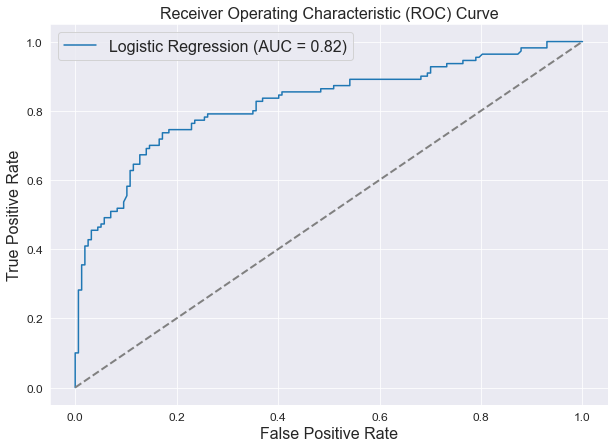

In [113]:

plt.figure(figsize=(10, 7))

plot_roc_curve(clf, X_test, Y_test, ax=plt.gca(), name='Logistic Regression')
plt.plot([0, 1], [0, 1], linestyle='--', color='gray', lw=2)  


plt.title('Receiver Operating Characteristic (ROC) Curve', fontsize=16)
plt.xlabel('False Positive Rate', fontsize=16)
plt.ylabel('True Positive Rate', fontsize=16)
plt.xticks(fontsize=12)
plt.yticks(fontsize=12)
plt.legend(fontsize=16)

In [114]:
test_data = pd.read_excel("test.xlsx")

to_drop = ['Name', 'Ticket', 'PassengerId']
test_data.drop(columns=to_drop, inplace=True)

test_data['Age'] = test_data.groupby(['Pclass'])['Age'].apply(lambda x:x.fillna(x.median()))
test_data['Fare'] = test_data.groupby(['Pclass'])['Fare'].apply(lambda x:x.fillna(x.median()))

test_data.Sex[test_data.Sex == 'male'] = 1
test_data.Sex[test_data.Sex == 'female'] = 0
test_data.Embarked[test_data.Embarked == 'C'] = 1
test_data.Embarked[test_data.Embarked == 'Q'] = 3
test_data.Embarked[test_data.Embarked == 'S'] = 2

normalized_age =(test_data['Age']-test_data['Age'].min())/(test_data['Age'].max()-test_data['Age'].min())
test_data['Age'] = normalized_age

normalized_fare = (test_data['Fare']-test_data['Fare'].min())/(test_data['Fare'].max()-test_data['Fare'].min())
test_data['Fare'] = normalized_fare

test_data.drop(columns=['Cabin'], inplace=True)
test_data.isnull().sum()

C:\Users\Pankaj\AppData\Local\Temp\ipykernel_25204\3164827353.py:9: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  test_data.Sex[test_data.Sex == 'male'] = 1
C:\Users\Pankaj\AppData\Local\Temp\ipykernel_25204\3164827353.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  test_data.Sex[test_data.Sex == 'female'] = 0
C:\Users\Pankaj\AppData\Local\Temp\ipykernel_25204\3164827353.py:11: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  test_da

Pclass      0
Sex         0
Age         0
SibSp       0
Parch       0
Fare        0
Embarked    0
dtype: int64

In [115]:
x = test_data[['Pclass', 'Sex', 'Age', 'SibSp', 'Fare' ]]
y = clf.predict(x)
test = pd.read_excel("test.xlsx")
survived = pd.DataFrame(y)
survived.columns = ["Survived"]
predictions = pd.concat([test, survived], axis=1)
predictions.to_csv('predictions.csv')
survived["Survived"].value_counts()

1    268
0    150
Name: Survived, dtype: int64